In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

sns.set_style("whitegrid")

colors = sns.color_palette("deep", 3)

In [3]:
results_base_dir = "/Users/lmatayoshi/Documents/Projects/tesis_notebooks/final_v2_experiments/dev/legendre/experiment_results/"

In [4]:
raw_dir = results_base_dir + "raw/eers/"
normalize_only_dir = results_base_dir + "normalize_only/eers/"
append_duration_only_dir = results_base_dir + "append_duration_only/eers/"
both_dir = results_base_dir + "both/eers/"
legendre_best_degree_dir = results_base_dir + "legendre_best_degree_eers/"

In [5]:
kappa_phonemes = ["b", "m", "B", "s", "D", "G", "w", "i"]

In [6]:
raw_dict = {}

In [7]:
def mean_kappa_values_by_degree(dir, numeric_filenames=False):
    raw_dict = {}
    for i in range(7):
        if numeric_filenames:
            degree_str = str(i)
        else:
            degree_str = "degree_" + str(i)
        filename = dir + degree_str
        lines = []
        with open(filename, "r") as f:
            for line in f.readlines():
                line = line.strip().split(":")
                lines.append(line)
        lines = lines[:-1]
        lines = [(l[0], float(l[1])) for l in lines]
        raw_dict[i] = dict(lines)
    raw_mean_values = {}
    for degree in raw_dict.keys():
        degree_dict = raw_dict[degree]
        mean = sum([degree_dict[p] for p in kappa_phonemes])/(float(len(kappa_phonemes)))
        raw_mean_values[degree] = mean
    return raw_mean_values

In [8]:
raw_mean_values = mean_kappa_values_by_degree(raw_dir)
append_duration_only_mean_values = mean_kappa_values_by_degree(append_duration_only_dir)
normalize_only_mean_values = mean_kappa_values_by_degree(normalize_only_dir)
both_mean_values = mean_kappa_values_by_degree(both_dir)
legendre_best_degree_mean_values = mean_kappa_values_by_degree(legendre_best_degree_dir, numeric_filenames=True)
lasso_values = [0.23721443636350001, 0.222249494439375, 0.2216239241115, 0.21903214394537501, 0.22053638355874999, 0.222738874800125, 0.22389387349875001]

In [9]:
for i in range(0, 6):
    print i
    print abs(both_mean_values[i] - legendre_best_degree_mean_values[i])

0
0.000100836818375
1
8.9766086125e-05
2
0.000367354215125
3
0.00012238370825
4
6.50383655e-05
5
0.0


In [10]:
output_dir="/Users/lmatayoshi/Documents/Projects/tesis_notebooks/final_v2_experiments/dev/plots/"

In [11]:
legendre_tunning_filename=output_dir + "legendre-tunning.png"

In [12]:
colors = sns.color_palette("deep", 3)

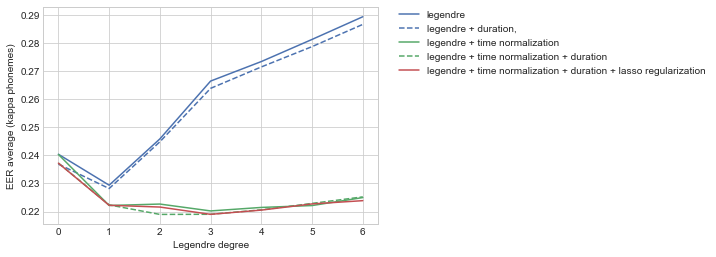

In [16]:
sns.set_style("whitegrid")
xs = raw_mean_values.keys()
ys_raw = [raw_mean_values[x] for x in xs]
ys_append_duration_only = [append_duration_only_mean_values[x] for x in xs]
ys_normalize_only = [normalize_only_mean_values[x] for x in xs]
ys_both = [both_mean_values[x] for x in xs]
plt.plot(xs, ys_raw, label="legendre", color=colors[0])
plt.plot(xs, ys_append_duration_only, label="legendre + duration,", color=colors[0], linestyle="--")
plt.plot(xs, ys_normalize_only, label="legendre + time normalization", color=colors[1])
plt.plot(xs, ys_both, label="legendre + time normalization + duration", color=colors[1], linestyle="--")
plt.plot(xs, lasso_values, label="legendre + time normalization + duration + lasso regularization", color=colors[2])
plt.legend(loc="upper left")
plt.xlabel("Legendre degree")
plt.ylabel("EER average (kappa phonemes)")
plt.savefig(legendre_tunning_filename)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.savefig(legendre_tunning_filename)
plt.show()

Not cutting labels when saving fig:

https://stackoverflow.com/questions/10101700/moving-matplotlib-legend-outside-of-the-axis-makes-it-cutoff-by-the-figure-box

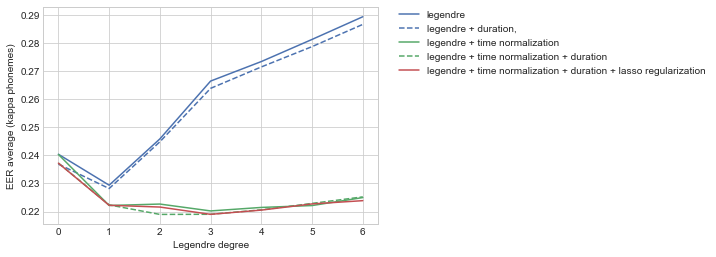

In [33]:
xs = raw_mean_values.keys()
ys_raw = [raw_mean_values[x] for x in xs]
ys_append_duration_only = [append_duration_only_mean_values[x] for x in xs]
ys_normalize_only = [normalize_only_mean_values[x] for x in xs]
ys_both = [both_mean_values[x] for x in xs]

fig = plt.figure(1)
ax = fig.add_subplot(111)

ax.plot(xs, ys_raw, label="legendre", color=colors[0])
ax.plot(xs, ys_append_duration_only, label="legendre + duration,", color=colors[0], linestyle="--")
ax.plot(xs, ys_normalize_only, label="legendre + time normalization", color=colors[1])
ax.plot(xs, ys_both, label="legendre + time normalization + duration", color=colors[1], linestyle="--")
ax.plot(xs, lasso_values, label="legendre + time normalization + duration + lasso regularization", color=colors[2])
handles, labels = ax.get_legend_handles_labels()
lgd = ax.legend(handles, labels, bbox_to_anchor=(1.05,1), loc=2, borderaxespad=0.)
ax.grid('on')
plt.xlabel("Legendre degree")
plt.ylabel("EER average (kappa phonemes)")
fig.savefig(legendre_tunning_filename, bbox_extra_artists=(lgd,), bbox_inches='tight')
plt.show()

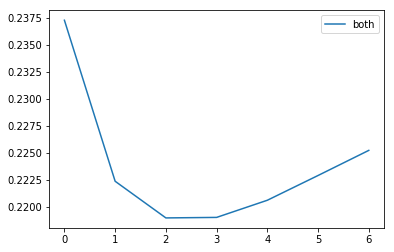

In [86]:
plt.clf()
#plt.plot(xs, ys_normalize_only, label="normalize only")
plt.plot(xs, ys_both, label="both")
plt.legend()
plt.show()

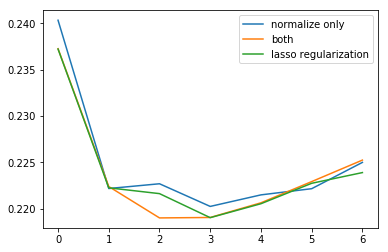

In [209]:
plt.plot(xs, ys_normalize_only, label="normalize only")
plt.plot(xs, ys_both, label="both")
plt.plot(xs, lasso_values, label="lasso regularization")
plt.legend()
plt.show()

## El mejor sistema está conformado por Legendre con grado 2 normalizando, appendeando la duración y sin Lasso Regression

Differencia entre 'both system' y 'normalize only' system

In [211]:
for i in range(len(xs)):
    print abs(ys_normalize_only[i] - ys_both[i])/ys_normalize_only[i]

0.012767599919
0.000961491968732
0.0165394574698
0.00541506799121
0.00385548199979
0.00344402784009
0.0011018393479


Diferencia entre 'both system' y regularization

In [212]:
for i in range(len(xs)):
    print abs(lasso_values[i] - ys_both[i])/ys_both[i]

0.000167016702294
0.000625364284947
0.0119594575874
9.07736322875e-05
0.000447984553443
0.000819331707723
0.0059753582524


# Lasso tunning

1) Plotear las 10 curvas

2) Armar el dataframe y encontrar el mínimo global

In [101]:
lasso_dir = results_base_dir + "lasso/by_alpha/"

In [118]:
alphas = ['0.1', '0.2', '0.3', '0.4', '0.5', '0.6', '0.7', '0.8', '0.9', '1.0']
alphas_float = [float(alpha) for alpha in alphas]
degrees = ['degree_0', 'degree_1', 'degree_2', 'degree_3', 'degree_4', 'degree_5', 'degree_6']

In [124]:
lasso_dict = {}
for alpha in alphas:
    values = []
    for degree in degrees:
        filename = lasso_dir + alpha + "/" + degree
        with open(filename, 'r') as f:
            lines = f.readlines()[:-1]
            lines = [float(line.strip().split(":")[1]) for line in lines]
            values.append(np.mean(lines))
    lasso_dict[alpha] = values

# Dataframe

In [178]:
lasso_output_filename = results_base_dir + "lasso/alpha_tunning.csv"

In [179]:
#base_matrix = np.array(alphas_float).reshape(-1,1)
base_matrix = np.array(lasso_dict['0.1']).reshape(1, -1)
for alpha in alphas[1:]:
    alpha_values = np.array(lasso_dict[alpha]).reshape(1, -1)
    base_matrix = np.vstack((base_matrix, alpha_values))

In [180]:
dataframe = pd.DataFrame(base_matrix, index=alphas)

In [150]:
dataframe

,0,1,2,3,4,5,6
0.1,0.237214,0.221938,0.221018,0.219156,0.221370,0.220511,0.222808
0.2,0.237214,0.222249,0.221624,0.219032,0.220536,0.222739,0.223894
0.3,0.237214,0.222877,0.221340,0.220024,0.221401,0.223367,0.225953
0.4,0.237214,0.223752,0.221138,0.219955,0.221434,0.225366,0.226174
0.5,0.237214,0.222706,0.221746,0.220993,0.222236,0.225384,0.227556
0.6,0.237214,0.220955,0.223946,0.222293,0.223943,0.226333,0.227086
0.7,0.237214,0.221801,0.223464,0.222969,0.224169,0.226379,0.227851
0.8,0.237214,0.220697,0.224134,0.222348,0.224103,0.227292,0.229679
0.9,0.237214,0.221388,0.223362,0.224377,0.223272,0.228134,0.229720
1.0,0.237214,0.221940,0.223751,0.223220,0.225573,0.228380,0.228983


## Análisis. ¿Hace diferencias normalizar?

Para cada grado, podría hacer el máximo menos el mínimo y analizar el valor absoluto o la diferencia relativa, respecto a valor sin normalización

In [184]:
serie_min_by_degree = dataframe.min(axis=0)

In [185]:
serie_max_by_degree = dataframe.max(axis=0)

In [189]:
serie_min_by_degree.values

array([ 0.23721444,  0.22069746,  0.22101838,  0.21903214,  0.22053638,
        0.22051119,  0.22280776])

In [190]:
serie_max_by_degree.values

array([ 0.23721444,  0.22375176,  0.22413392,  0.22437729,  0.22557251,
        0.22838007,  0.2297202 ])

In [192]:
differences = serie_max_by_degree.values - serie_min_by_degree.values

In [193]:
differences

array([ 0.        ,  0.0030543 ,  0.00311553,  0.00534514,  0.00503613,
        0.00786888,  0.00691244])

In [201]:
for i in range(differences.shape[0]):
    print differences[i]/serie_min_by_degree.values[i]

0.0
0.0138393285666
0.014096258217
0.0244034703587
0.0228358131864
0.0356847111961
0.031024222727


In [167]:
dataframe.idxmin(axis=1)

0.1    3
0.2    3
0.3    3
0.4    3
0.5    3
0.6    1
0.7    1
0.8    1
0.9    1
1.0    1
dtype: int64

In [170]:
dataframe.min(axis=1)

0.1    0.219156
0.2    0.219032
0.3    0.220024
0.4    0.219955
0.5    0.220993
0.6    0.220955
0.7    0.221801
0.8    0.220697
0.9    0.221388
1.0    0.221940
dtype: float64

In [171]:
dataframe.min(axis=1).idxmin()

'0.2'

Minimum is obtained with alpha=0.2

In [202]:
lasso_dict['0.2']

[0.23721443636350001,
 0.222249494439375,
 0.2216239241115,
 0.21903214394537501,
 0.22053638355874999,
 0.222738874800125,
 0.22389387349875001]

# Plots

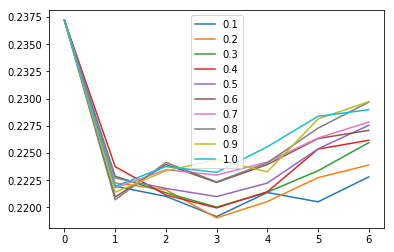

In [116]:
xs = [0, 1, 2, 3, 4, 5, 6]
for alpha in alphas:
    plt.plot(xs, lasso_dict[alpha], label=alpha)
plt.legend()
plt.show()

# Sanity check main tunning

In [226]:
main_tunning_degree_3 = np.array([ 0.21900393,  0.21904028,  0.219999  ,  0.22001357,  0.22089228, 0.22228324,  0.222969  ,  0.22234812,  0.22435224,  0.22323873])

In [227]:
own_values_degree_3 = dataframe[3].values

In [228]:
own_values_degree_3 - main_tunning_degree_3

array([  1.52379935e-04,  -8.13605462e-06,   2.49100150e-05,
        -5.89353556e-05,   1.00968903e-04,   9.51022763e-06,
         4.45399997e-09,   1.30062500e-09,   2.50483777e-05,
        -1.82652519e-05])

In [218]:
dataframe

,0,1,2,3,4,5,6
0.1,0.237214,0.221938,0.221018,0.219156,0.221370,0.220511,0.222808
0.2,0.237214,0.222249,0.221624,0.219032,0.220536,0.222739,0.223894
0.3,0.237214,0.222877,0.221340,0.220024,0.221401,0.223367,0.225953
0.4,0.237214,0.223752,0.221138,0.219955,0.221434,0.225366,0.226174
0.5,0.237214,0.222706,0.221746,0.220993,0.222236,0.225384,0.227556
0.6,0.237214,0.220955,0.223946,0.222293,0.223943,0.226333,0.227086
0.7,0.237214,0.221801,0.223464,0.222969,0.224169,0.226379,0.227851
0.8,0.237214,0.220697,0.224134,0.222348,0.224103,0.227292,0.229679
0.9,0.237214,0.221388,0.223362,0.224377,0.223272,0.228134,0.229720
1.0,0.237214,0.221940,0.223751,0.223220,0.225573,0.228380,0.228983


In [223]:
own_values_degree_3 = dataframe[3].values

array([ 0.21915631,  0.21903214,  0.22002391,  0.21995463,  0.22099325,
        0.22229275,  0.222969  ,  0.22234812,  0.22437729,  0.22322046])

# Sanity check

In [54]:
mac_0 = dict([("rr", 0.397148676171), ("B", 0.226635514019), ("D", 0.249875559982), ("G", 0.242774566474), ("N", 0.253567508233), ("Y", 0.493150684932), ("a", 0.361024913556), ("c", 0.428571428571), ("b", 0.2), ("e", 0.424837218081), ("d", 0.40932642487), ("g", 0.297702297702), ("f", 0.400000000001), ("i", 0.261483281268), ("k", 0.370244565218), ("m", 0.189504373179), ("l", 0.285506190822), ("o", 0.423373329431), ("n", 0.440855704698), ("p", 0.334597156397), ("s", 0.381250000002), ("r", 0.360336262895), ("u", 0.382594792143), ("t", 0.333900612662), ("w", 0.166), ("y", 0.365853658538), ("x", 0.195574162679), ("z", 0.266366470384)])
ukelele_0 = dict([("rr", 0.397148676171), ("B", 0.227004512322), ("D", 0.25), ("G", 0.242774566474), ("N", 0.253567508233), ("Y", 0.493150684932), ("a", 0.361297318612), ("c", 0.428571428571), ("b", 0.2), ("e", 0.424577807461), ("d", 0.40932642487), ("g", 0.297632468997), ("f", 0.400000000001), ("i", 0.261712439418), ("k", 0.370608899297), ("m", 0.189504373179), ("l", 0.285506190824), ("o", 0.423688011554), ("n", 0.442393736018), ("p", 0.334679746105), ("s", 0.385416666666), ("r", 0.360718379824), ("u", 0.383817427384), ("t", 0.333560245065), ("w", 0.166), ("y", 0.365267019976), ("x", 0.195574162679), ("z", 0.26712496931)])

In [55]:
mac_1 = dict([("rr", 0.348268839104), ("B", 0.237810094099), ("D", 0.242062137248), ("G", 0.225409836066), ("N", 0.227116900926), ("Y", 0.411042944785), ("a", 0.358144030933), ("c", 0.380952380951), ("b", 0.187341772153), ("e", 0.420609165955), ("d", 0.393258426967), ("g", 0.273957158963), ("f", 0.300000000001), ("i", 0.268467251857), ("k", 0.357547169811), ("m", 0.181422569028), ("l", 0.277032810271), ("o", 0.418034825871), ("n", 0.422767938653), ("p", 0.32796208531), ("s", 0.318474271321), ("r", 0.342916884475), ("u", 0.365145228217), ("t", 0.314526588847), ("w", 0.174577634755), ("y", 0.34843205575), ("x", 0.202614379085), ("z", 0.232)])
ukelele_1 = dict([("rr", 0.348268839104), ("B", 0.237810094099), ("D", 0.242391304348), ("G", 0.225409836066), ("N", 0.227116900926), ("Y", 0.411042944785), ("a", 0.35862735621), ("c", 0.380952380951), ("b", 0.187341772153), ("e", 0.420307634237), ("d", 0.393258426967), ("g", 0.273957158963), ("f", 0.300000000001), ("i", 0.268982229402), ("k", 0.358016304347), ("m", 0.182127396413), ("l", 0.277494537509), ("o", 0.417428984112), ("n", 0.423378076063), ("p", 0.328754437413), ("s", 0.318749999998), ("r", 0.34301369863), ("u", 0.365145228217), ("t", 0.314526588847), ("w", 0.174577634755), ("y", 0.348432055751), ("x", 0.202614379085), ("z", 0.232)])

In [98]:
np.linspace(0.1, 1.0, 10)

array([ 0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ])